In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

selected_features_mapping = {
'n_flows,n_packets,n_bytes,n_dest_asn,n_dest_ports,n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl': 1,
'n_flows,n_packets,n_bytes': 2,
'n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes,avg_ttl': 3, 
'tcp_udp_ratio_bytes,dir_ratio_bytes,avg_duration,avg_ttl': 4}

  
def print_graphs_and_tables(df, hyperparameters):
    fig, axes = plt.subplots(2, 2, figsize=(5*2, 2*4))
    axes = axes.flatten()
    
    for idx, param in enumerate(hyperparameters):
        sns.violinplot(data=df, x=param, y='f1_macro', ax=axes[idx])
        axes[idx].set_title(f'{'f1_macro'} x {param}')
    
    plt.tight_layout()
    plt.show()

    print("\n\n")
                      
    def format_first_col_value(x):
        return str(x)
    
    for param in hyperparameters:
        summary_table = (
            df
            .groupby(param)["f1_macro"]
            .agg(["mean", "median", "std", "max"])
            .reset_index()
        )
    
        first_col = summary_table.columns[0]
        summary_table[first_col] = summary_table[first_col].apply(format_first_col_value)
    
        print(f"\n===== Hyperparameter: {param} =====\n")
        print(tabulate(
            summary_table,
            headers="keys",
            tablefmt="fancy_grid",
            showindex=False,
            floatfmt=".4f",
            stralign="center",
            numalign="center"
        ))

    

# Time series clustering

In [2]:
df_results = pd.read_csv("clustering_results.csv")
df_results['selected_features_mapped'] = df_results['features'].map(selected_features_mapping)

## Top 10 TS clustering models by the macro F1-score

In [3]:
df_sorted = df_results.sort_values(by='f1_macro',ascending = False)
df_sorted.head(10)

,n_clusters,metric,features,undersampling,preprocessing,accuracy,f1_macro,macro_recall,selected_features_mapped
44,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.909184,0.694866,0.694700,1
100,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.909341,0.693746,0.692679,1
59,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.917405,0.692307,0.661513,1
101,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.917043,0.690606,0.661639,1
52,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,z_score,0.907820,0.689059,0.690349,1
57,2000,euclidean,"tcp_udp_ratio_bytes,dir_ratio_bytes,avg_durati...",True,z_score,0.908199,0.688143,0.693574,4
22,1500,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.908984,0.687308,0.682729,1
62,1000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.908670,0.686652,0.685018,1
126,750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.908334,0.686235,0.689527,1
87,1000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,z_score,0.906543,0.685988,0.697604,1


##  Macro F1-score x hyperparameters graphs and tables for TS clustering

In [4]:
hyperparameters = ["n_clusters", "undersampling", "preprocessing", "selected_features_mapped"]

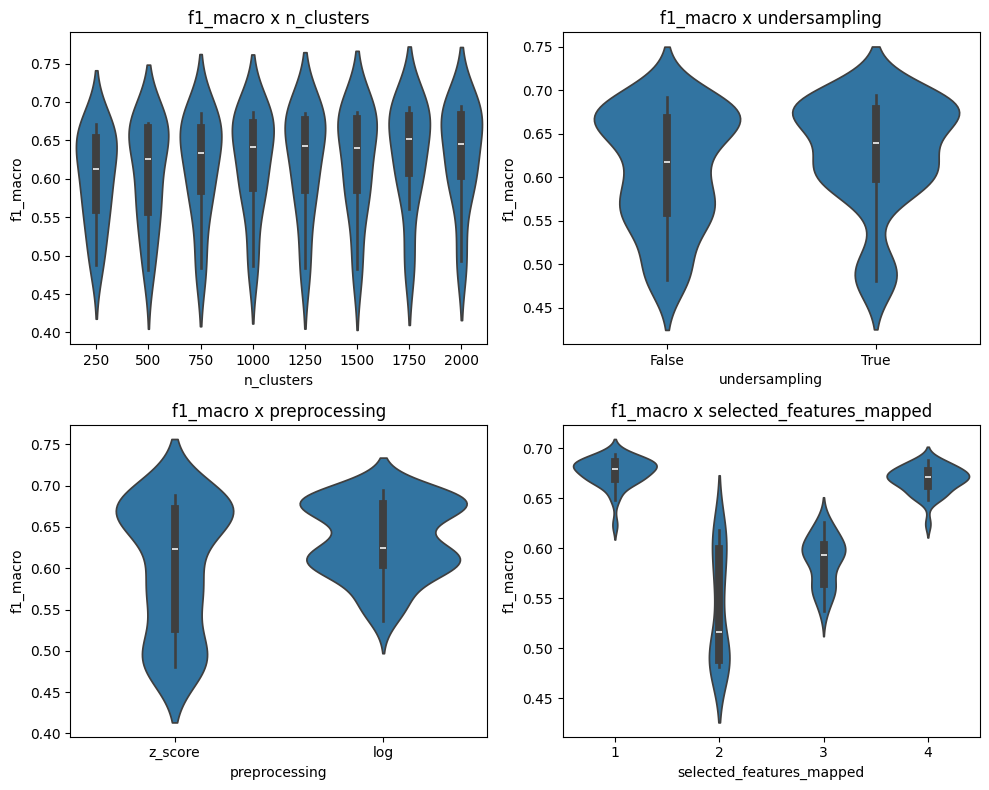





===== Hyperparameter: n_clusters =====

╒══════════════╤════════╤══════════╤════════╤════════╕
│  n_clusters  │  mean  │  median  │  std   │  max   │
╞══════════════╪════════╪══════════╪════════╪════════╡
│     250      │ 0.6001 │  0.6130  │ 0.0609 │ 0.6712 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     500      │ 0.6076 │  0.6251  │ 0.0661 │ 0.6726 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     750      │ 0.6155 │  0.6338  │ 0.0662 │ 0.6862 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1000     │ 0.6209 │  0.6408  │ 0.0654 │ 0.6867 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1250     │ 0.6209 │  0.6422  │ 0.0687 │ 0.6858 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1500     │ 0.6209 │  0.6401  │ 0.0689 │ 0.6873 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1750     │ 0.6295 │  0.6513  │ 0.0683 │ 0.6937 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     2000     │ 0.62

In [5]:
print_graphs_and_tables(df_results, hyperparameters)

# Histogram clustering

In [6]:
df_results = pd.read_csv("histogram_clustering_results.csv")
df_results['selected_features_mapped'] = df_results['features'].map(selected_features_mapping)

## Top 10 histogram clustering models by the macro F1-score

In [7]:
df_sorted = df_results.sort_values(by='f1_macro',ascending = False)
df_sorted.head(10)

,n_clusters,metric,features,undersampling,preprocessing,accuracy,f1_macro,macro_recall,selected_features_mapped
44,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.921519,0.730671,0.729954,1
68,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,z_score,0.918510,0.726506,0.721124,1
100,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.918742,0.725622,0.725912,1
59,2000,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.925670,0.725475,0.698857,1
22,1500,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.918299,0.725305,0.729044,1
101,1750,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.924837,0.723222,0.697173,1
66,1250,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,log,0.918997,0.723031,0.727182,1
57,2000,euclidean,"tcp_udp_ratio_bytes,dir_ratio_bytes,avg_durati...",True,z_score,0.918250,0.721774,0.714584,4
21,1500,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",True,z_score,0.915885,0.721598,0.716650,1
125,1500,euclidean,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",False,log,0.924950,0.721359,0.685744,1


##  Macro F1-score x hyperparameters graphs and tables for histogram clustering

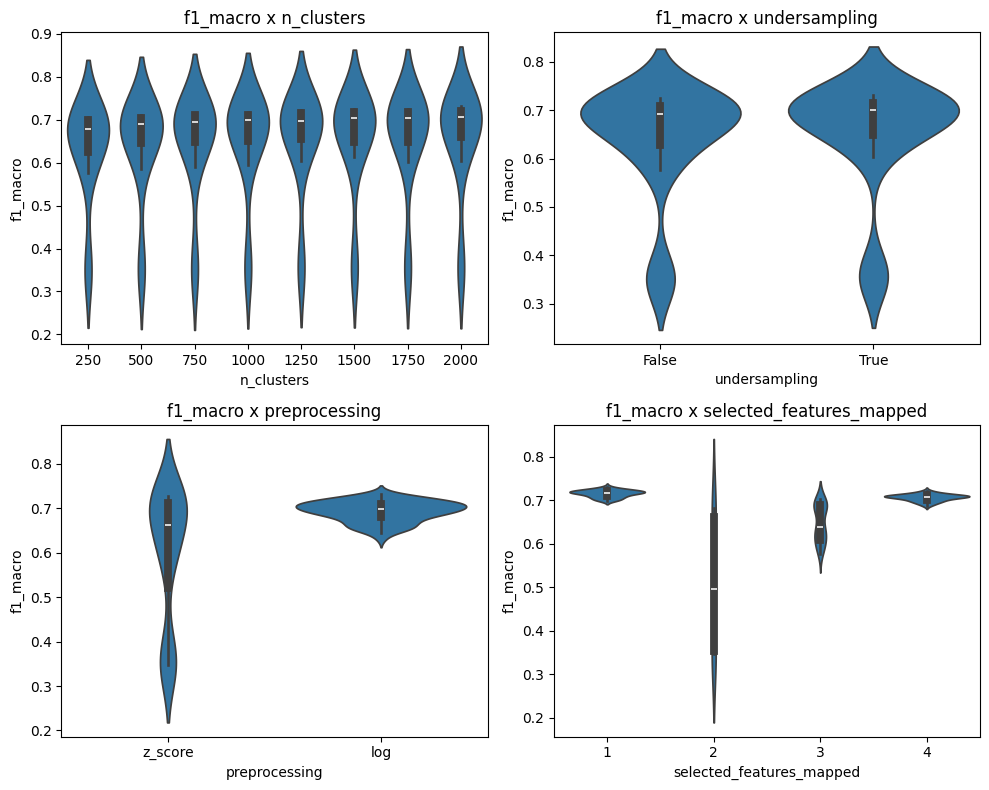





===== Hyperparameter: n_clusters =====

╒══════════════╤════════╤══════════╤════════╤════════╕
│  n_clusters  │  mean  │  median  │  std   │  max   │
╞══════════════╪════════╪══════════╪════════╪════════╡
│     250      │ 0.6288 │  0.6785  │ 0.1156 │ 0.7063 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     500      │ 0.6382 │  0.6893  │ 0.1171 │ 0.7118 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     750      │ 0.6431 │  0.6939  │ 0.1189 │ 0.7166 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1000     │ 0.6465 │  0.6994  │ 0.1191 │ 0.7187 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1250     │ 0.6492 │  0.6980  │ 0.1192 │ 0.7230 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1500     │ 0.6505 │  0.7030  │ 0.1198 │ 0.7253 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1750     │ 0.6506 │  0.7042  │ 0.1206 │ 0.7256 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     2000     │ 0.65

In [8]:
print_graphs_and_tables(df_results, hyperparameters)